# Segmentacja obrazów

**Klasyfikacja**
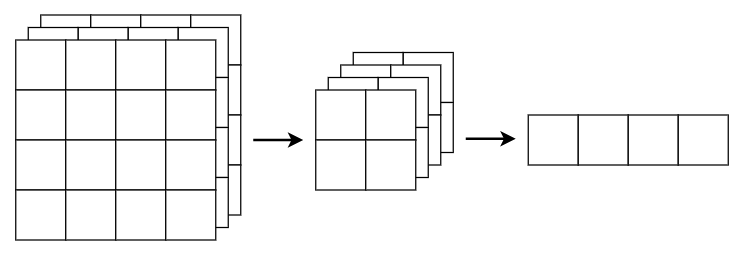

**Segmentacja**
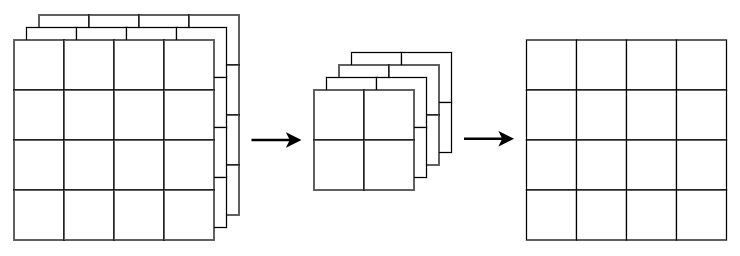

In [1]:
import numpy as np
import torch
from torch import nn
from torchvision import models
from torchvision import transforms as T
from PIL import Image

## ConvTranspose2d

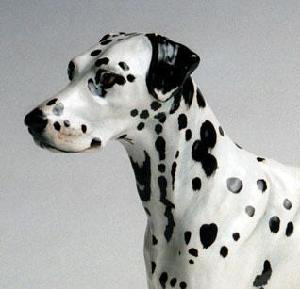

In [2]:
img = Image.open("dog.jpg")
img

In [3]:
transform = T.ToTensor()
img_tensor = transform(img)
X = img_tensor.unsqueeze(0)

In [4]:
conv_trans = nn.ConvTranspose2d(3, 3, kernel_size=4, padding=1, stride=2, bias=False)

In [5]:
Y = conv_trans(X)

In [6]:
out_img = Y[0].permute(1, 2, 0).detach()

In [7]:
out_img

tensor([[[ 0.1026,  0.0849,  0.0561],
         [-0.1076,  0.0277,  0.0233],
         [ 0.1345,  0.1395, -0.0447],
         ...,
         [-0.1365,  0.0330,  0.0288],
         [ 0.1646,  0.1739, -0.0540],
         [-0.1045,  0.0213, -0.0845]],

        [[ 0.0634,  0.0671, -0.0267],
         [-0.0567,  0.2109,  0.1449],
         [ 0.0342,  0.0105, -0.0461],
         ...,
         [-0.0728,  0.2687,  0.1773],
         [ 0.0396,  0.0053, -0.0509],
         [-0.0127,  0.1266,  0.1971]],

        [[ 0.0544,  0.0494,  0.1851],
         [-0.1083,  0.1481, -0.0609],
         [ 0.1076,  0.1372,  0.1915],
         ...,
         [-0.1376,  0.1806, -0.0749],
         [ 0.1327,  0.1774,  0.2423],
         [-0.1052,  0.0501, -0.0683]],

        ...,

        [[ 0.0894,  0.0913, -0.0305],
         [-0.0855,  0.3068,  0.2009],
         [ 0.0444,  0.0073, -0.0568],
         ...,
         [-0.1028,  0.3467,  0.2104],
         [ 0.0468, -0.0034, -0.0503],
         [-0.0225,  0.1665,  0.2339]],

        [[

In [8]:
out_img.shape

torch.Size([578, 600, 3])

In [9]:
np.array(img).shape

(289, 300, 3)

In [10]:
def bilinear_kernel(in_channels, out_channels, kernel_size):
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = (torch.arange(kernel_size).reshape(-1, 1), torch.arange(kernel_size).reshape(1, -1))
    filt = (1 - torch.abs(og[0] - center) / factor) * (1 - torch.abs(og[1] - center) / factor)
    weight = torch.zeros((in_channels, out_channels, kernel_size, kernel_size))
    weight[range(in_channels), range(out_channels), :, :] = filt
    return weight

In [11]:
conv_trans.weight.data.copy_(bilinear_kernel(3, 3, 4))

tensor([[[[0.0625, 0.1875, 0.1875, 0.0625],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.0625, 0.1875, 0.1875, 0.0625]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0625, 0.1875, 0.1875, 0.0625],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.0625, 0.1875, 0.1875, 0.0625]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0

In [12]:
Y = conv_trans(X)

In [13]:
out_img = Y[0].permute(1, 2, 0).detach()

In [14]:
out_img

tensor([[[0.2934, 0.3044, 0.3132],
         [0.3919, 0.4066, 0.4184],
         [0.3934, 0.4081, 0.4199],
         ...,
         [0.5007, 0.5037, 0.5096],
         [0.5022, 0.5051, 0.5110],
         [0.3772, 0.3794, 0.3838]],

        [[0.3904, 0.4051, 0.4169],
         [0.5216, 0.5412, 0.5569],
         [0.5235, 0.5431, 0.5588],
         ...,
         [0.6686, 0.6725, 0.6804],
         [0.6706, 0.6745, 0.6824],
         [0.5037, 0.5066, 0.5125]],

        [[0.3890, 0.4037, 0.4154],
         [0.5196, 0.5392, 0.5549],
         [0.5216, 0.5412, 0.5569],
         ...,
         [0.6706, 0.6745, 0.6824],
         [0.6725, 0.6765, 0.6843],
         [0.5051, 0.5081, 0.5140]],

        ...,

        [[0.5713, 0.5816, 0.5787],
         [0.7615, 0.7752, 0.7713],
         [0.7610, 0.7748, 0.7708],
         ...,
         [0.8718, 0.8640, 0.8169],
         [0.8703, 0.8625, 0.8154],
         [0.6522, 0.6463, 0.6110]],

        [[0.5728, 0.5801, 0.5772],
         [0.7630, 0.7728, 0.7689],
         [0.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)
    plt.show()

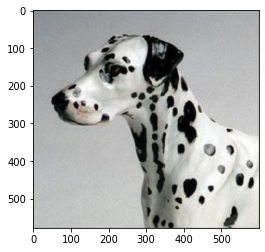

In [16]:
imshow(out_img)

## ResNet

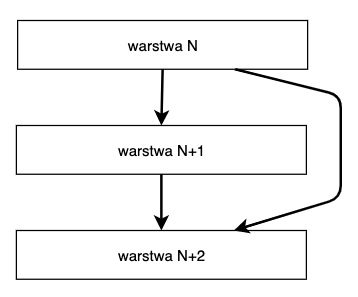

In [17]:
resnet = models.resnet18(pretrained=True)

In [18]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
resnet.layer1

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [20]:
resnet.avgpool

AdaptiveAvgPool2d(output_size=(1, 1))

In [21]:
resnet.fc

Linear(in_features=512, out_features=1000, bias=True)

In [22]:
net = nn.Sequential(*list(resnet.children())[:-2])

In [23]:
net

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [24]:
X = torch.rand((1, 3, 320, 320))

In [25]:
with torch.no_grad():
    print(net(X).shape)

torch.Size([1, 512, 10, 10])


In [26]:
num_classes = 21

In [27]:
net.add_module('final_conv', nn.Conv2d(512, num_classes, kernel_size=1))
net.add_module('transpose_conv', nn.ConvTranspose2d(num_classes, num_classes,
                                                    kernel_size=64, padding=16, stride=32))

In [28]:
with torch.no_grad():
    print(net(X).shape)

torch.Size([1, 21, 320, 320])


In [29]:
weights = bilinear_kernel(num_classes, num_classes, 64)
net.transpose_conv.weight.data.copy_(weights)

tensor([[[[0.0002, 0.0007, 0.0012,  ..., 0.0012, 0.0007, 0.0002],
          [0.0007, 0.0022, 0.0037,  ..., 0.0037, 0.0022, 0.0007],
          [0.0012, 0.0037, 0.0061,  ..., 0.0061, 0.0037, 0.0012],
          ...,
          [0.0012, 0.0037, 0.0061,  ..., 0.0061, 0.0037, 0.0012],
          [0.0007, 0.0022, 0.0037,  ..., 0.0037, 0.0022, 0.0007],
          [0.0002, 0.0007, 0.0012,  ..., 0.0012, 0.0007, 0.0002]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [30]:
net

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con